In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

In [4]:
RN8_c10_bz = np.load('eval_curves/ResNet8_CIFAR10_EV_Bezier_1_2/curve.npz')
RN26_c10_bz = np.load('eval_curves/ResNet26_CIFAR10_EV_Bezier_1_2/curve.npz')
RN38_c10_bz = np.load('eval_curves/ResNet38_CIFAR10_EV_Bezier_1_2/curve.npz')
RN65_c10_bz = np.load('eval_curves/ResNet65_CIFAR10_EV_Bezier_1_2/curve.npz')
RN119_c10_bz = np.load('eval_curves/ResNet119_CIFAR10_EV_Bezier_1_2/curve.npz')

RN8_c10_pc = np.load('eval_curves/ResNet8_CIFAR10_EV_PolyChain_1_2/curve.npz')
RN26_c10_pc = np.load('eval_curves/ResNet26_CIFAR10_EV_PolyChain_1_2/curve.npz')
RN38_c10_pc = np.load('eval_curves/ResNet38_CIFAR10_EV_PolyChain_1_2/curve.npz')
RN65_c10_pc = np.load('eval_curves/ResNet65_CIFAR10_EV_PolyChain_1_2/curve.npz')
RN119_c10_pc = np.load('eval_curves/ResNet119_CIFAR10_EV_PolyChain_1_2/curve.npz')

RN8_c100_bz = np.load('eval_curves/ResNet8_CIFAR100_EV_Bezier_1_2/curve.npz')
RN26_c100_bz = np.load('eval_curves/ResNet26_CIFAR100_EV_Bezier_1_2/curve.npz')
RN38_c100_bz = np.load('eval_curves/ResNet38_CIFAR100_EV_Bezier_1_2/curve.npz')
RN65_c100_bz = np.load('eval_curves/ResNet65_CIFAR100_EV_Bezier_1_2/curve.npz')
RN119_c100_bz = np.load('eval_curves/ResNet119_CIFAR100_EV_Bezier_1_2/curve.npz')

RN8_c100_pc = np.load('eval_curves/ResNet8_CIFAR100_EV_PolyChain_1_2/curve.npz')
RN26_c100_pc = np.load('eval_curves/ResNet26_CIFAR100_EV_PolyChain_1_2/curve.npz')
RN38_c100_pc = np.load('eval_curves/ResNet38_CIFAR100_EV_PolyChain_1_2/curve.npz')
RN65_c100_pc = np.load('eval_curves/ResNet65_CIFAR100_EV_PolyChain_1_2/curve.npz')
RN119_c100_pc = np.load('eval_curves/ResNet119_CIFAR100_EV_PolyChain_1_2/curve.npz')

RN8_c10_convex = np.loadtxt('results/convex_combo/ResNet8_CIFAR10_convex.csv', delimiter=',', skiprows=1)
RN26_c10_convex = np.loadtxt('results/convex_combo/ResNet26_CIFAR10_convex.csv', delimiter=',', skiprows=1)
RN38_c10_convex = np.loadtxt('results/convex_combo/ResNet38_CIFAR10_convex.csv', delimiter=',', skiprows=1)
RN65_c10_convex = np.loadtxt('results/convex_combo/ResNet65_CIFAR10_convex.csv', delimiter=',', skiprows=1)
RN119_c10_convex = np.loadtxt('results/convex_combo/ResNet119_CIFAR10_convex.csv', delimiter=',', skiprows=1)

RN8_c100_convex = np.loadtxt('results/convex_combo/ResNet8_CIFAR100_convex.csv', delimiter=',', skiprows=1)
RN26_c100_convex = np.loadtxt('results/convex_combo/ResNet26_CIFAR100_convex.csv', delimiter=',', skiprows=1)
RN38_c100_convex = np.loadtxt('results/convex_combo/ResNet38_CIFAR100_convex.csv', delimiter=',', skiprows=1)
RN65_c100_convex = np.loadtxt('results/convex_combo/ResNet65_CIFAR100_convex.csv', delimiter=',', skiprows=1)
RN119_c100_convex = np.loadtxt('results/convex_combo/ResNet119_CIFAR100_convex.csv', delimiter=',', skiprows=1)

models_cifar10 = [
    ('ResNet8', RN8_c10_bz, RN8_c10_pc, RN8_c10_convex),
    ('ResNet26', RN26_c10_bz, RN26_c10_pc, RN26_c10_convex),
    ('ResNet38', RN38_c10_bz, RN38_c10_pc, RN38_c10_convex),
    ('ResNet65', RN65_c10_bz, RN65_c10_pc, RN65_c10_convex),
    ('ResNet119', RN119_c10_bz, RN119_c10_pc, RN119_c10_convex),
]

models_cifar100 = [
    ('ResNet8', RN8_c100_bz, RN8_c100_pc, RN8_c100_convex),
    ('ResNet26', RN26_c100_bz, RN26_c100_pc, RN26_c100_convex),
    ('ResNet38', RN38_c100_bz, RN38_c100_pc, RN38_c100_convex),
    ('ResNet65', RN65_c100_bz, RN65_c100_pc, RN65_c100_convex),
    ('ResNet119', RN119_c100_bz, RN119_c100_pc, RN119_c100_convex),
]


In [ ]:
def summarize_models(models):

    def compute_metrics(ts, te):
        auc = np.max(te) - np.trapezoid(te, ts)
        peak = np.max(te) - np.min(te)
        return auc, peak

    rows = {}

    for name, bz, pc, convex in models:
        # ---- Bezier metrics ----
        ts_bz = bz['ts']
        te_bz = bz['te_acc']
        auc_bz, peak_bz = compute_metrics(ts_bz, te_bz)

        # ---- Convex metrics ----
        ts_cx = convex[:, 0]
        te_cx = convex[:, 2]
        auc_cx, peak_cx = compute_metrics(ts_cx, te_cx)

        # Store formatted values for this model
        rows[name] = {
            "AUC_Convex":        f"{auc_cx:.4f}",
            "PeakHeight_Convex": f"{peak_cx:.2f}%",
            "AUC_Bezier":        f"{auc_bz:.4f}",
            "PeakHeight_Bezier": f"{peak_bz:.2f}%",
        }

    df = pd.DataFrame.from_dict(rows, orient="index")
    return df


In [ ]:
summary_cifar100 = summarize_models(models_cifar100)
print(summary_cifar100)

          AUC_Convex PeakHeight_Convex AUC_Bezier PeakHeight_Bezier
ResNet8      35.0173            63.74%     4.1395             7.02%
ResNet26     39.5827            85.68%     2.7302             5.19%
ResNet38     41.9170            91.16%     2.2612             4.22%
ResNet65     38.1347            94.06%     1.1581             2.29%
ResNet119    34.8687            96.60%     1.1634             2.08%


In [12]:
def plot_model_curves(models, type="te", title="Curve Test Accuracy for ResNet Models on CIFAR-10"):
    fig, axs = plt.subplots(1, 2, figsize=(14,5), sharey=True)

    # ---- Left: Bezier curves ----
    for name, bz, _ in models:
        ts = bz['ts']
        acc = bz[f'{type}_acc']
        axs[0].plot(ts, acc, label=name)

    axs[0].set_xlabel('t (Path Parameter)')
    if type == "te":
        axs[0].set_ylabel('Test Accuracy (%)')
    elif type == "tr":
        axs[0].set_ylabel('Train Accuracy (%)')
    axs[0].set_title('Bezier')
    axs[0].legend()

    # ---- Right: PolyChain curves ----
    for name, _, pc in models:
        ts = pc['ts']
        acc = pc[f'{type}_acc']
        axs[1].plot(ts, acc, label=name)

    axs[1].set_xlabel('t (Path Parameter)')
    axs[1].set_title('PolyChain')
    axs[1].legend()

    # ---- Global title / layout ----
    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

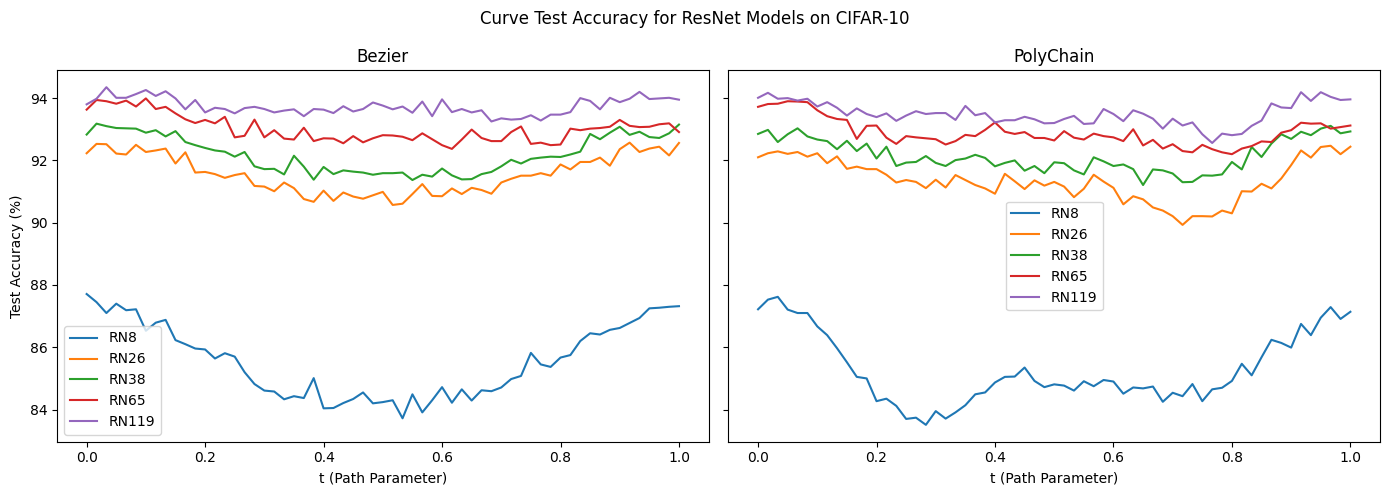

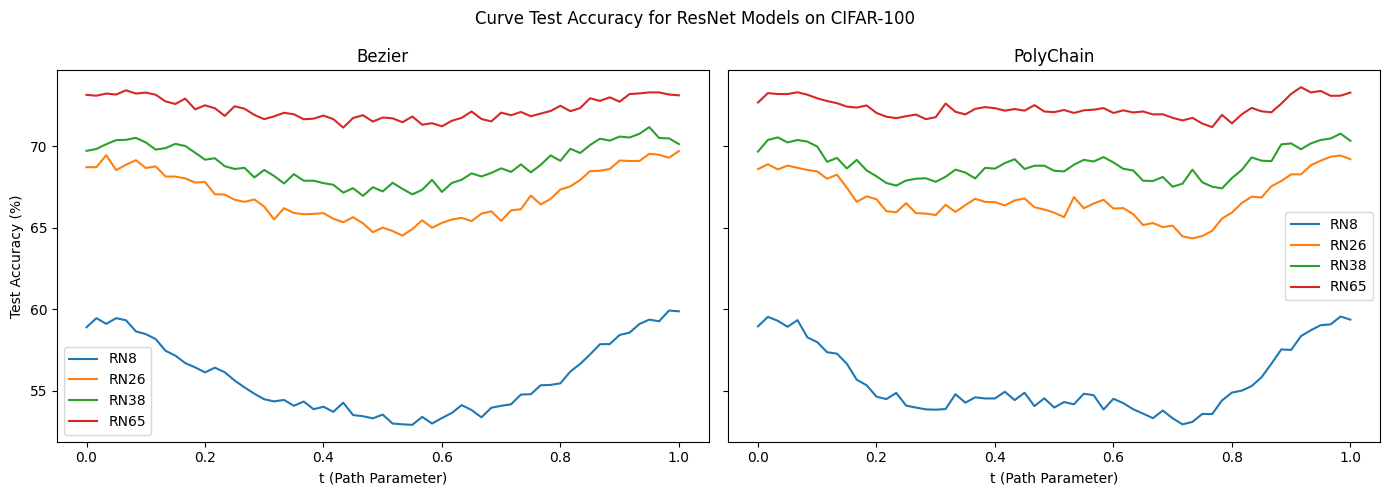

In [ ]:
plot_model_curves(models_cifar10, type="te", title="Curve Test Accuracy for ResNet Models on CIFAR-10")
plot_model_curves(models_cifar100, type="te", title="Curve Test Accuracy for ResNet Models on CIFAR-100")
plot_model_curves(models_cifar10, type="tr", title="Curve Train Accuracy for ResNet Models on CIFAR-10")
plot_model_curves(models_cifar100, type="tr", title="Curve Train Accuracy for ResNet Models on CIFAR-100")

In [16]:

angle_df = pd.read_csv('results/angles/angle_data.csv', delimiter=';')

# Split before dropping dataset, so filters still work
cifar10_df = angle_df[angle_df['dataset'] == 'CIFAR10'].copy()
cifar100_df = angle_df[angle_df['dataset'] == 'CIFAR100'].copy()

# Columns to rename
rename_map = {
    "AC_norm": "||A-C||",
    "BC_norm": "||B-C||"
}

# Apply to both dataframes
for df in [cifar10_df, cifar100_df]:
    df.rename(columns=rename_map, inplace=True)
    df.drop(columns=["angle_rad", "dataset"], inplace=True, errors="ignore")
    
    # Round numeric columns to 3 decimals
    numeric_cols = df.select_dtypes(include="number").columns
    df[numeric_cols] = df[numeric_cols].round(2)

print("CIFAR10 Data:")
display(cifar10_df)

print("CIFAR100 Data:")
display(cifar100_df)



CIFAR10 Data:


,model,||A-C||,||B-C||,angle_deg
0,ResNet8,38.75,38.69,69.39
1,ResNet26,49.16,48.49,62.31
2,ResNet38,49.78,53.37,62.78
3,ResNet65,50.40,49.96,56.91
4,ResNet119,51.89,54.48,55.16


CIFAR100 Data:


,model,||A-C||,||B-C||,angle_deg
5,ResNet8,58.72,59.81,70.75
6,ResNet26,76.25,78.02,68.76
7,ResNet38,85.79,84.68,70.18
8,ResNet65,70.44,72.95,65.91


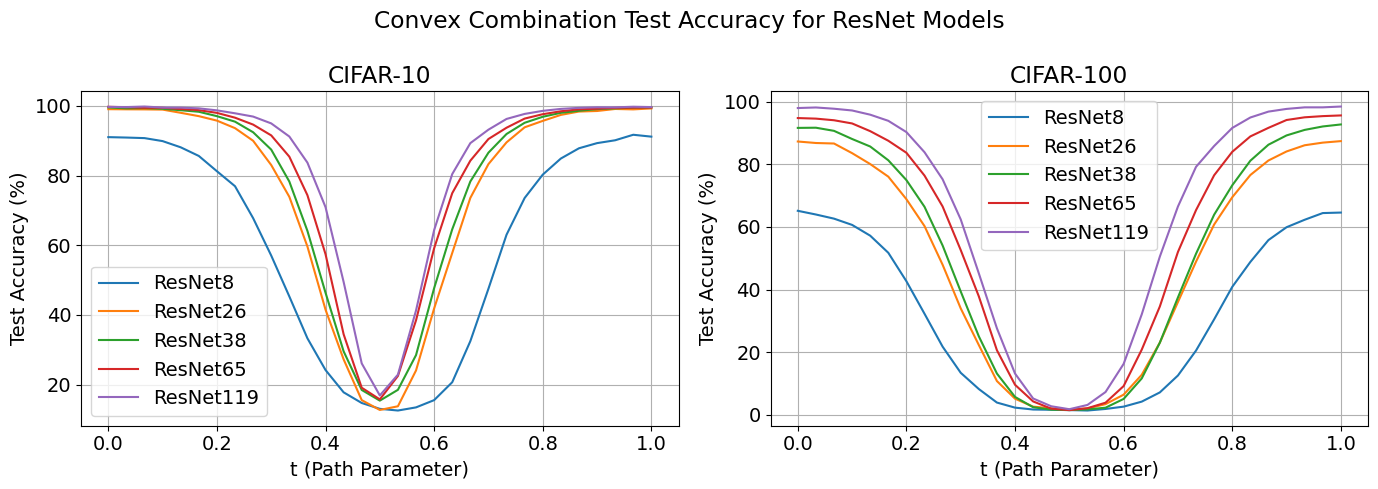

In [12]:
# increase font size
plt.rcParams.update({'font.size': 14})
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# --- Left plot: CIFAR-10 ---
axs[0].plot(RN8_c10_convex[:,0], RN8_c10_convex[:,2], label='ResNet8')
axs[0].plot(RN26_c10_convex[:,0], RN26_c10_convex[:,2], label='ResNet26')
axs[0].plot(RN38_c10_convex[:,0], RN38_c10_convex[:,2], label='ResNet38')
axs[0].plot(RN65_c10_convex[:,0], RN65_c10_convex[:,2], label='ResNet65')
axs[0].plot(RN119_c10_convex[:,0], RN119_c10_convex[:,2], label='ResNet119')

axs[0].legend()
axs[0].set_xlabel('t (Path Parameter)')
axs[0].set_ylabel('Test Accuracy (%)')
axs[0].set_title('CIFAR-10')
axs[0].grid(True)

# --- Right plot: CIFAR-100 ---
axs[1].plot(RN8_c100_convex[:,0], RN8_c100_convex[:,2], label='ResNet8')
axs[1].plot(RN26_c100_convex[:,0], RN26_c100_convex[:,2], label='ResNet26')
axs[1].plot(RN38_c100_convex[:,0], RN38_c100_convex[:,2], label='ResNet38')
axs[1].plot(RN65_c100_convex[:,0], RN65_c100_convex[:,2], label='ResNet65')
axs[1].plot(RN119_c100_convex[:,0], RN119_c100_convex[:,2], label='ResNet119')

axs[1].legend()
axs[1].set_xlabel('t (Path Parameter)')
axs[1].set_ylabel('Test Accuracy (%)')
axs[1].set_title('CIFAR-100')
axs[1].grid(True)

fig.suptitle('Convex Combination Test Accuracy for ResNet Models')
plt.tight_layout()
plt.show()
